### Feature Engeening of Housing Project

#### Importing Necessary Liabries.

In [55]:
#data-manuplation
import pandas as pd
import numpy as np

#ml_tools
from sklearn.preprocessing import PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,ElasticNet,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

#result_visualitation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading dataset

In [56]:
df=pd.read_csv("nepalhousing_dataset.csv")
df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,Air Condition,...,TV,TV Cable,Terrace,Washing Machine,Water Filter,Water Purifier,Water Supply,Water Tank,Water Well,Wifi
0,"Imadol, Lalitpur",29000000.0,1369.000,12.0,west,3.0,5.0,4.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
1,"Satdobato, Lalitpur",47500000.0,1026.750,10.0,west,4.5,5.0,6.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Imadol, Lalitpur",19900000.0,787.175,10.0,west,2.5,4.0,4.0,21.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bhaisepati, Lalitpur",40000000.0,2395.750,12.0,north-west,2.5,4.0,3.0,22.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bhaisepati, Lalitpur",33000000.0,1095.200,13.0,north-west,2.5,4.0,3.0,7.0,0,...,0,0,0,0,0,1,0,0,0,0


##### FROM EDA we found the amminites has no much corelation with price so ,

In [57]:

df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,Air Condition,...,TV,TV Cable,Terrace,Washing Machine,Water Filter,Water Purifier,Water Supply,Water Tank,Water Well,Wifi
0,"Imadol, Lalitpur",29000000.0,1369.000,12.0,west,3.0,5.0,4.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
1,"Satdobato, Lalitpur",47500000.0,1026.750,10.0,west,4.5,5.0,6.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Imadol, Lalitpur",19900000.0,787.175,10.0,west,2.5,4.0,4.0,21.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bhaisepati, Lalitpur",40000000.0,2395.750,12.0,north-west,2.5,4.0,3.0,22.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bhaisepati, Lalitpur",33000000.0,1095.200,13.0,north-west,2.5,4.0,3.0,7.0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOCATION              5568 non-null   object 
 1   PRICE                 5244 non-null   float64
 2   LAND AREA             5512 non-null   float64
 3   ROAD ACCESS           5564 non-null   float64
 4   FACING                5408 non-null   object 
 5   FLOOR                 5456 non-null   float64
 6   BEDROOM               5152 non-null   float64
 7   BATHROOM              5032 non-null   float64
 8   PROPERTY AGE          5506 non-null   float64
 9   Air Condition         5568 non-null   int64  
 10  AirCon                5568 non-null   int64  
 11  Amphitheatre          5568 non-null   int64  
 12  Attic                 5568 non-null   int64  
 13  Backyard              5568 non-null   int64  
 14  Balcony               5568 non-null   int64  
 15  Basement             

In [59]:
df.isnull().sum()

LOCATION            0
PRICE             324
LAND AREA          56
ROAD ACCESS         4
FACING            160
                 ... 
Water Purifier      0
Water Supply        0
Water Tank          0
Water Well          0
Wifi                0
Length: 80, dtype: int64

In [60]:
for feature in df.columns:
    try:
        print(f"The minimun value of {feature} is :{df[feature].min()}")
    except: pass

The minimun value of LOCATION is : BAFAL,  KATHMANDU
The minimun value of PRICE is :2680000.0
The minimun value of LAND AREA is :0.0
The minimun value of ROAD ACCESS is :0.0
The minimun value of FLOOR is :1.0
The minimun value of BEDROOM is :1.0
The minimun value of BATHROOM is :1.0
The minimun value of PROPERTY AGE is :1.0
The minimun value of Air Condition is :0
The minimun value of AirCon is :0
The minimun value of Amphitheatre is :0
The minimun value of Attic is :0
The minimun value of Backyard is :0
The minimun value of Balcony is :0
The minimun value of Basement is :0
The minimun value of Bathroom is :0
The minimun value of Bathtub is :0
The minimun value of Bed Room is :0
The minimun value of Boring Water is :0
The minimun value of CC Camera is :0
The minimun value of CCTV is :0
The minimun value of Cafeteria is :0
The minimun value of Closet is :0
The minimun value of Deck is :0
The minimun value of Dining Room is :0
The minimun value of Drainage is :0
The minimun value of Drin

In [61]:
df['LAND AREA']=df['LAND AREA'].replace(to_replace={0:np.nan,2.5:np.nan,4.2:np.nan,4.5:np.nan,9.25:np.nan})

### FEATURE EXTRACTION

In [62]:
df["CITY"]=df["LOCATION"].str.split(",").str[1]

In [63]:
df["LOCATION"]=df["LOCATION"].str.split(",").str[0]

#### SIMPLE IMPUTER

In [64]:
df['ROAD ACCESS']=df['ROAD ACCESS'].fillna(value=df['ROAD ACCESS'].median())
df['FACING']=df['FACING'].fillna(value=df['FACING'].mode()[0])
df['FLOOR']=df['FLOOR'].fillna(value=df['FLOOR'].median())
df['BEDROOM']=df['BEDROOM'].fillna(value=df['BEDROOM'].median())
df['BATHROOM']=df['BATHROOM'].fillna(value=df['BATHROOM'].median())

#### DROPNA

In [65]:
df=df.dropna()

In [66]:
df.shape

(5140, 81)

In [67]:
#df=df.drop_duplicates()

#### NUMERICAL FEATURES


In [68]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 78


#### CATEGORICAL FEATURES

In [69]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [70]:
df

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,Air Condition,...,TV Cable,Terrace,Washing Machine,Water Filter,Water Purifier,Water Supply,Water Tank,Water Well,Wifi,CITY
0,Imadol,29000000.0,1369.000,12.0,west,3.0,5.0,4.0,5.0,0,...,0,1,0,0,0,0,0,0,0,Lalitpur
1,Satdobato,47500000.0,1026.750,10.0,west,4.5,5.0,6.0,5.0,0,...,0,0,0,0,0,0,0,0,0,Lalitpur
2,Imadol,19900000.0,787.175,10.0,west,2.5,4.0,4.0,21.0,0,...,0,0,0,0,0,0,0,0,0,Lalitpur
3,Bhaisepati,40000000.0,2395.750,12.0,north-west,2.5,4.0,3.0,22.0,0,...,0,0,0,0,0,0,0,0,0,Lalitpur
4,Bhaisepati,33000000.0,1095.200,13.0,north-west,2.5,4.0,3.0,7.0,0,...,0,0,0,0,1,0,0,0,0,Lalitpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,Sitapiala,26000000.0,1540.125,16.0,north,2.5,4.0,4.0,5.0,0,...,0,0,0,0,0,0,0,0,0,Kathmandu
5564,Bhatbhateni,30000000.0,1540.125,16.0,south,3.0,3.0,3.0,5.0,0,...,0,0,0,0,0,0,0,0,0,Kathmandu
5565,Syuchatar,16000000.0,1608.575,16.0,south,2.5,4.0,2.0,9.0,0,...,0,0,0,0,0,0,0,0,0,Kathmandu
5566,Sano Bharayang,35000000.0,2156.175,16.0,north-west,2.5,5.0,3.0,4.0,1,...,1,0,1,0,0,1,1,1,1,Kathmandu


In [71]:
df["CITY"]=df["CITY"].apply(lambda x:x.lower())
df["CITY"]=df["CITY"].str.replace(' ', '', regex=True)

In [72]:
df.sample(5)

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,Air Condition,...,TV Cable,Terrace,Washing Machine,Water Filter,Water Purifier,Water Supply,Water Tank,Water Well,Wifi,CITY
704,Tikathali,25000000.0,1060.975,13.0,north,2.5,6.0,3.0,25.0,0,...,0,0,0,0,0,0,0,0,0,lalitpur
2235,Thulobharyang,24000000.0,1095.200,16.0,west,2.0,5.0,2.0,21.0,0,...,0,0,0,0,0,0,0,0,0,kathmandu
2107,Sanobharyang,18500000.0,1745.475,12.0,south,2.5,7.0,3.0,13.0,0,...,0,0,0,0,0,0,0,0,0,kathmandu
4058,Greenhill City,25500000.0,1369.000,13.0,south,3.0,5.0,2.0,11.0,0,...,0,0,0,0,0,0,0,0,0,kathmandu
3681,Sukedhara,39800000.0,2053.500,12.0,south,2.5,4.0,4.0,7.0,0,...,0,0,0,0,0,0,0,0,0,kathmandu


In [73]:
df=df[df["CITY"].isin(['kathmandu',"lalitpur","bhaktapur"])]


#### SPLITING DF INTO X AND Y
* X - are the features that are dependent
* y- is the target feature.

In [74]:
X=df.drop(columns="PRICE",axis=1)
y=df["PRICE"]

#### CHECKING SKEWNESS
* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [75]:
X.skew(numeric_only=True)

LAND AREA         10.652894
ROAD ACCESS       24.187884
FLOOR              1.649635
BEDROOM            4.493972
BATHROOM           5.779581
                    ...    
Water Purifier     5.462727
Water Supply       4.116420
Water Tank         4.618926
Water Well         3.416997
Wifi               5.667263
Length: 77, dtype: float64

##### The features like land_area,road_acess,floor,bedroom,bathroom are screkwed so should be treated well.

#### POWER TRANSFORMATION

In [76]:
pt=PowerTransformer(method='yeo-johnson')

tranfrom_feature=["LAND AREA","ROAD ACCESS","FLOOR","BEDROOM","BATHROOM"]

X_pt=pt.fit_transform(X[tranfrom_feature])

In [77]:
X_copy=pd.DataFrame(X_pt,columns=tranfrom_feature)
X_copy.skew() 

LAND AREA     -0.291020
ROAD ACCESS   -0.233819
FLOOR          0.017315
BEDROOM       -0.076051
BATHROOM       0.064540
dtype: float64

Text(0.5, 1.0, 'KDE plot of y after log_transf')

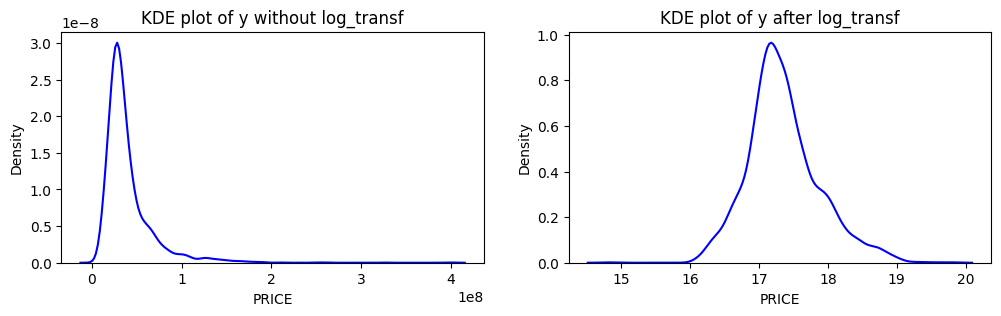

In [78]:
y_log=np.log(y+1)

fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.kdeplot(data=y,ax=ax[0],color="blue")
ax[0].set_title('KDE plot of y without log_transf')

sns.kdeplot(data=y_log,ax=ax[1],color="blue")
ax[1].set_title('KDE plot of y after log_transf')

<Axes: xlabel='FACING', ylabel='Count'>

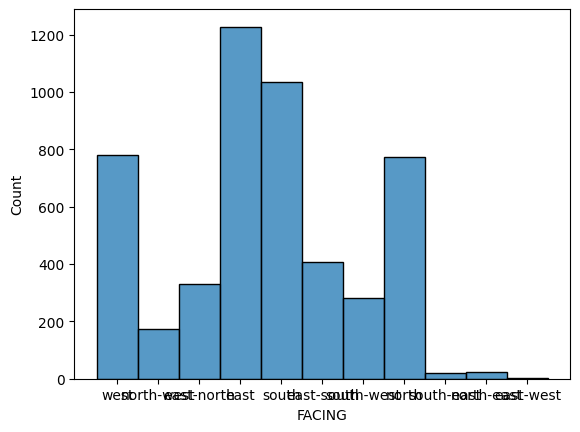

In [79]:
sns.histplot(data=X['FACING'])

In [80]:
from sklearn.preprocessing import MinMaxScaler
oe=OrdinalEncoder()
minmax=MinMaxScaler()

X_facing=oe.fit_transform(X[["FACING"]])


X_facing_copy=pd.DataFrame(X_facing)

In [81]:
#facing_maping=X["FACING"].value_counts()
#X['FACING_copy']=X["FACING"].map(facing_maping)

Text(0.5, 1.0, 'Histplot of FACING with Maping Encoding')

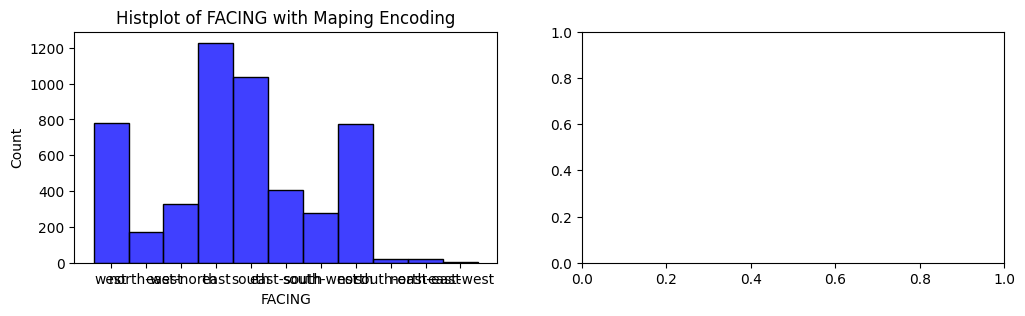

In [82]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with Maping Encoding')

#sns.histplot(data=StandardScaler().fit_transform(X[['FACING_copy']]),ax=ax[1],color="blue")
#ax[1].set_title('Histplot of FACING after Maping Encoder')

Text(0.5, 1.0, 'Histplot of FACING after OE')

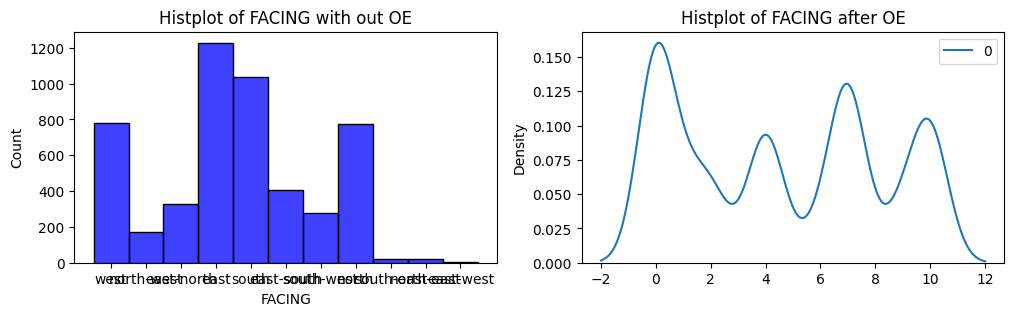

In [83]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with out OE')

sns.kdeplot(data=X_facing_copy,ax=ax[1],color="blue")
ax[1].set_title('Histplot of FACING after OE')

Text(0.5, 1.0, 'Histplot of FACING after OE')

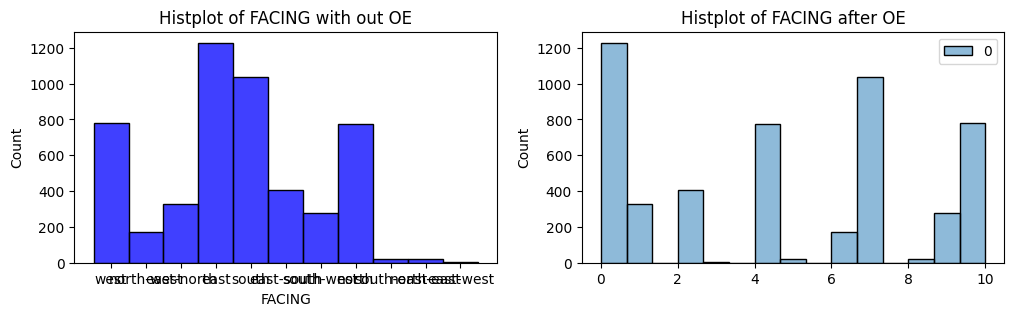

In [84]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with out OE')

sns.histplot(data=X_facing_copy,ax=ax[1],color="blue")
ax[1].set_title('Histplot of FACING after OE')



In [85]:
#ocation_maping=X["LOCATION"].value_counts()
#X['LOCATION']=X["LOCATION"].map(location_maping)

### COLUMN TRANSFORMER

In [86]:
cat_features,num_features

(['LOCATION', 'FACING', 'CITY'],
 ['PRICE',
  'LAND AREA',
  'ROAD ACCESS',
  'FLOOR',
  'BEDROOM',
  'BATHROOM',
  'PROPERTY AGE',
  'Air Condition',
  'AirCon',
  'Amphitheatre',
  'Attic',
  'Backyard',
  'Balcony',
  'Basement',
  'Bathroom',
  'Bathtub',
  'Bed Room',
  'Boring Water',
  'CC Camera',
  'CCTV',
  'Cafeteria',
  'Closet',
  'Deck',
  'Dining Room',
  'Drainage',
  'Drinking Water',
  'Earthquake Resistant',
  'Family Room',
  'Fencing',
  'Fire Place',
  'Fridge',
  'Frontyard',
  'Garage',
  'Garden',
  'Gazebo',
  'Guest Room',
  'Gym',
  'Intercom',
  'Internet',
  'Iron',
  'Jacuzzi',
  'Kids Playground',
  'Laundry Room',
  'Lawn',
  'Lift',
  'Living Room',
  'Maid Room',
  'Maintenance',
  'Marbel',
  'Master Bedroom',
  'MiCrowave',
  'Microwave',
  'Modular Kitchen',
  'Pantry',
  'Parking',
  'Parquet',
  'Playground',
  'Power Backup',
  'Power Backup Water',
  'Prayer Room',
  'Reserve Tank',
  'Security Staff',
  'Servant Quarter',
  'Servent Quarter',


In [87]:
location_labels=X["LOCATION"].value_counts().sort_values(ascending=False).head(5).index

for label in location_labels:
    X[label]=np.where(X["LOCATION"]==label,1,0)

#city_labels={"kathmandu":0,"lalitpur":-1,"bhaktapur":1}

#X["CITY"]=X['CITY'].map(city_labels)


X["FACING"]=OrdinalEncoder().fit_transform(X[["FACING"]])
X["CITY"]=OrdinalEncoder().fit_transform(X[["CITY"]])



X=X.drop(columns=["LOCATION"])



In [88]:
X["CITY"]

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
5563    1.0
5564    1.0
5565    1.0
5566    1.0
5567    1.0
Name: CITY, Length: 5050, dtype: float64

In [89]:
X["CITY"].skew()

0.39353992891700723

<Axes: xlabel='CITY', ylabel='Density'>

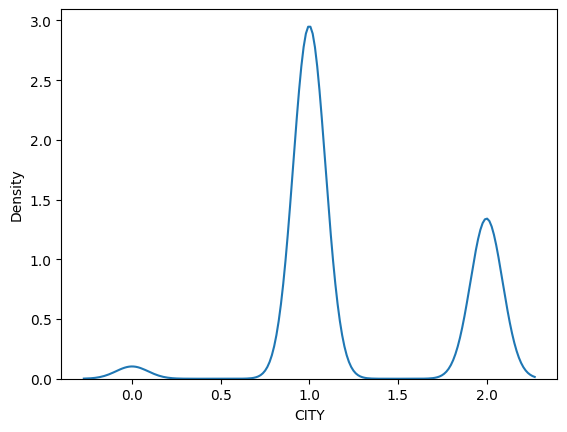

In [90]:
sns.kdeplot(data=X["CITY"])

In [91]:
X["CITY"]=MinMaxScaler().fit_transform(X[["CITY"]])

<Axes: xlabel='CITY', ylabel='Density'>

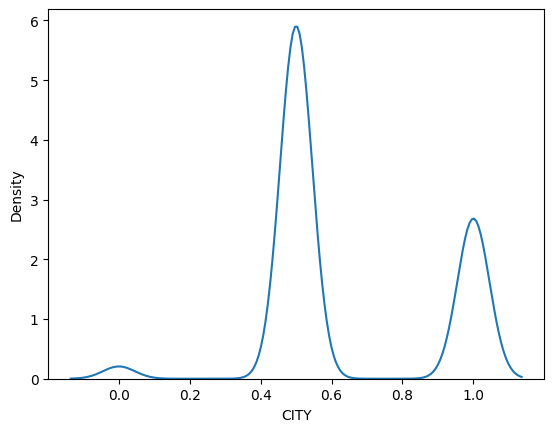

In [92]:
sns.kdeplot(data=X["CITY"])

In [93]:

from scipy.stats import skew

print("Skewness after transformation:", skew(X["CITY"]))


Skewness after transformation: 0.39342302622283604


In [94]:
X["CITY"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5563    0.5
5564    0.5
5565    0.5
5566    0.5
5567    0.5
Name: CITY, Length: 5050, dtype: float64

In [95]:
from scipy.stats import skew

X["CITY"].skew()

0.39353992891700723

In [96]:


#location_maping=X["LOCATION"].value_counts()
#X['LOCATION']=X["LOCATION"].map(location_maping)

#X['LOCATION']=OrdinalEncoder().fit_transform(X[["LOCATION"]])
#X["FACING"]=OrdinalEncoder().fit_transform(X[["FACING"]])
#X["CITY"]=OrdinalEncoder().fit_transform(X[["CITY"]])





In [97]:
num_features.remove("PRICE")

In [98]:
X.columns=X.columns.astype(str)

X=MinMaxScaler().fit_transform(X)




#X[num_features]=PowerTransformer(method='yeo-johnson').fit_transform(X[num_features])
#y=np.log(y+1)
#X[cat_features]=StandardScaler().fit_transform(X[cat_features])

In [99]:
X.shape

(5050, 84)

In [100]:
y

0       29000000.0
1       47500000.0
2       19900000.0
3       40000000.0
4       33000000.0
           ...    
5563    26000000.0
5564    30000000.0
5565    16000000.0
5566    35000000.0
5567    48000000.0
Name: PRICE, Length: 5050, dtype: float64

In [101]:
###
from sklearn.decomposition import PCA

pca=PCA(n_components=10)

X=pca.fit_transform(X)

### TRAIN TEST SPLIT

In [102]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=43
)

In [103]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LGBMRegressor()


]

# Metrics to evaluate
accuracy_metrics = [mean_absolute_error, root_mean_squared_error, r2_score]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for metric in accuracy_metrics:
        score = metric(y_test, y_pred)
        result = {"model":model.__class__.__name__,"metric":metric.__name__,"score":score}
        print(f'The {metric.__name__} of {model.__class__.__name__} is: {score}')
    print('-----------------------------------------------------------------')
        



The mean_absolute_error of LinearRegression is: 16669225.139733959
The root_mean_squared_error of LinearRegression is: 23442971.77025923
The r2_score of LinearRegression is: 0.0647410811519914
-----------------------------------------------------------------
The mean_absolute_error of DecisionTreeRegressor is: 4504224.422442243
The root_mean_squared_error of DecisionTreeRegressor is: 15545090.523504145
The r2_score of DecisionTreeRegressor is: 0.5887621877500323
-----------------------------------------------------------------


The mean_absolute_error of XGBRegressor is: 9052594.945544554
The root_mean_squared_error of XGBRegressor is: 14863165.389749069
The r2_score of XGBRegressor is: 0.6240508128917883
-----------------------------------------------------------------
The mean_absolute_error of Ridge is: 16670015.807392176
The root_mean_squared_error of Ridge is: 23443220.404034838
The r2_score of Ridge is: 0.0647212425247411
-----------------------------------------------------------------
The mean_absolute_error of Lasso is: 16669225.322433142
The root_mean_squared_error of Lasso is: 23442971.795430236
The r2_score of Lasso is: 0.06474107914359395
-----------------------------------------------------------------
The mean_absolute_error of ElasticNet is: 17307855.868551724
The root_mean_squared_error of ElasticNet is: 24008940.619553342
The r2_score of ElasticNet is: 0.019037232004414872
-----------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### FROM THE ABOVE MODEL TEST WE ARE PICKING 3 MODEL- DecisionTree , XGBoost ,LightGB

In [104]:
from sklearn.model_selection import GridSearchCV

#### Grid Search CV for Decisiion Tree Regressor

In [105]:
#grid search cv

param_grid = {
    'max_depth': [1,2,3,4,5,10,20,15,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'poisson','friedman_mse']
}

grid_search_decision_tree=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=8)

grid_search_decision_tree.fit(X_train,y_train)

print("Best Parameters:", grid_search_decision_tree.best_params_)
print("Best Score (MSE):", grid_search_decision_tree.best_score_)


Best Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (MSE): 0.5084091036240641


#### Hyperparameter Tuning LIGHTGB

In [106]:
lgb = LGBMRegressor(random_state=42)

# Define the parameter grid
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform Grid Search
#grid_search_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb, cv=5, scoring='r2', verbose=1, n_jobs=-1)
#grid_search_lgb.fit(X_train, y_train)

# Best parameters and score
#print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
#print("Best R2 score for LightGBM:", grid_search_lgb.best_score_)

In [107]:

random_search_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=param_grid_lgb, cv=5, scoring='r2', n_iter=50, random_state=43, verbose=1, n_jobs=-1)
random_search_lgb.fit(X_train, y_train)

print("Best parameters for LightGBM:", random_search_lgb.best_params_)
print("Best R2 score for LightGBM:", random_search_lgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 10
[LightGBM] [Info] Start training from score 40675960.395545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

#### PARAMETER TUNINING XGBoost